## Megamove
In this notebook I first replicate the Megamove model from Trommersheuser et al, for selecting the optimal 
movement end point in a landscape of expected gains. Then I will extend that idea to 3d space

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib notebook

In [13]:
# parameters
g0 = 100 # the gain if the target region is hit
g1 = -100 # the gain if the penalty region is hit
target_size = np.degrees(np.sin(0.1))
penalty_size = np.degrees(np.sin(0.1))

xs, ys = np.meshgrid(np.linspace(-10,10,1000),np.linspace(-10,10,1000))

In [4]:
def gauss2d(x,y,var,x_m,y_m):
    return np.exp( -( (x-x_m)**2 + (y-y_m)**2) /(2*var))/(2*np.pi*var)

In [5]:
# define the circular target
def distance(x, y, x_m, y_m):
    return ((x - x_m)^2 + (y - y_m)^2)^1/2

def check(x,y,xm,ym,r):
    return (((x - 0)**2 + (y - 0)**2) < r**2).astype(int)


circle = check(xs,ys,0,0,1)

In [6]:
def plotgaussian(ranges,x_m,y_m,var,n_points=1000):
    xs, ys = np.meshgrid(np.linspace(-ranges,ranges,n_points),np.linspace(-ranges,ranges,n_points))
    gaussian = gauss2d(xs,ys,var,x_m,y_m)
    plt.imshow(gaussian)
    plt.show()

In [7]:
x_m = 0
y_m = 0
movement_var = 6

<IPython.core.display.Javascript object>


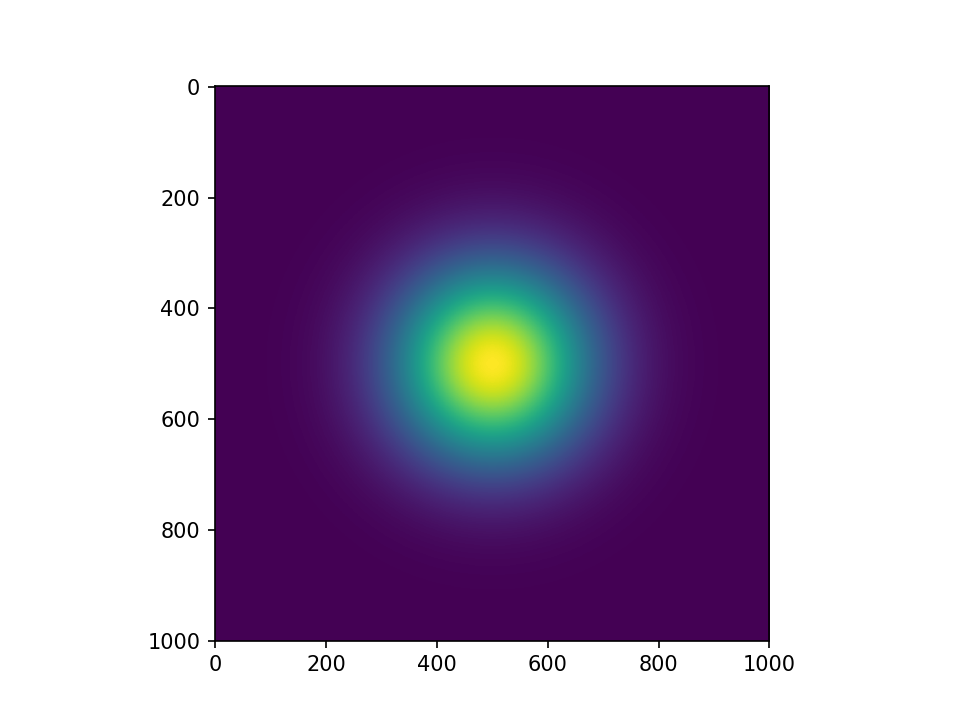

In [8]:
plotgaussian(10,x_m,y_m,movement_var)

<IPython.core.display.Javascript object>


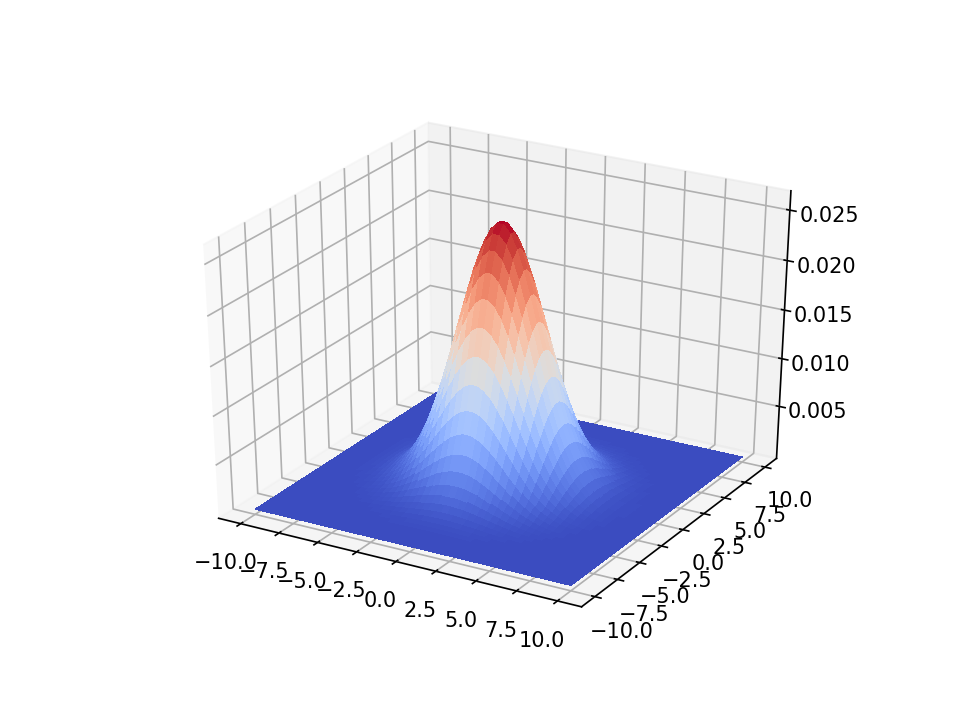

In [10]:
fig = plt.figure()
ax = fig.gca(projection='3d')

xs, ys = np.meshgrid(np.linspace(-10,10),np.linspace(-10,10))
gaussian = gauss2d(xs,ys,movement_var,x_m,y_m)

surf = ax.plot_surface(xs, ys, gaussian, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

In [52]:
def target(gain,xs,ys,x_c,y_c,r):
    return gain*((xs-x_c)**2 + (ys-y_c)**2 <r**2).astype(float)

<IPython.core.display.Javascript object>


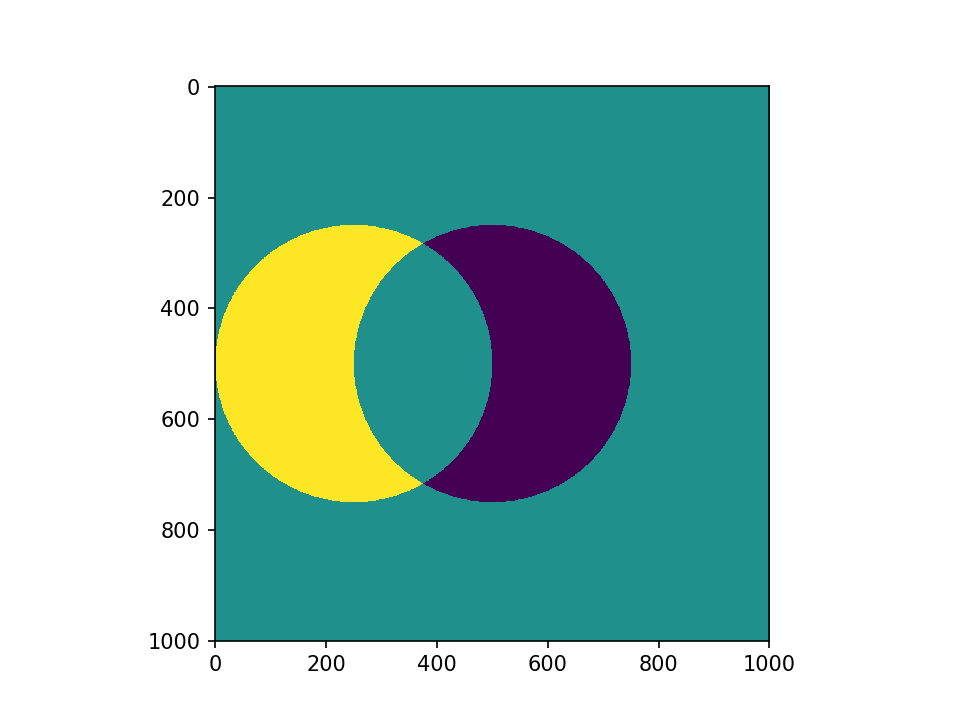

In [53]:
plt.imshow(target(100,xs,ys,30,0,5)+target(-100,xs,ys,35,0,5))
plt.show()

In [54]:
xs, ys = np.meshgrid(np.linspace(25,45,1000),np.linspace(-10,10,1000))


<IPython.core.display.Javascript object>


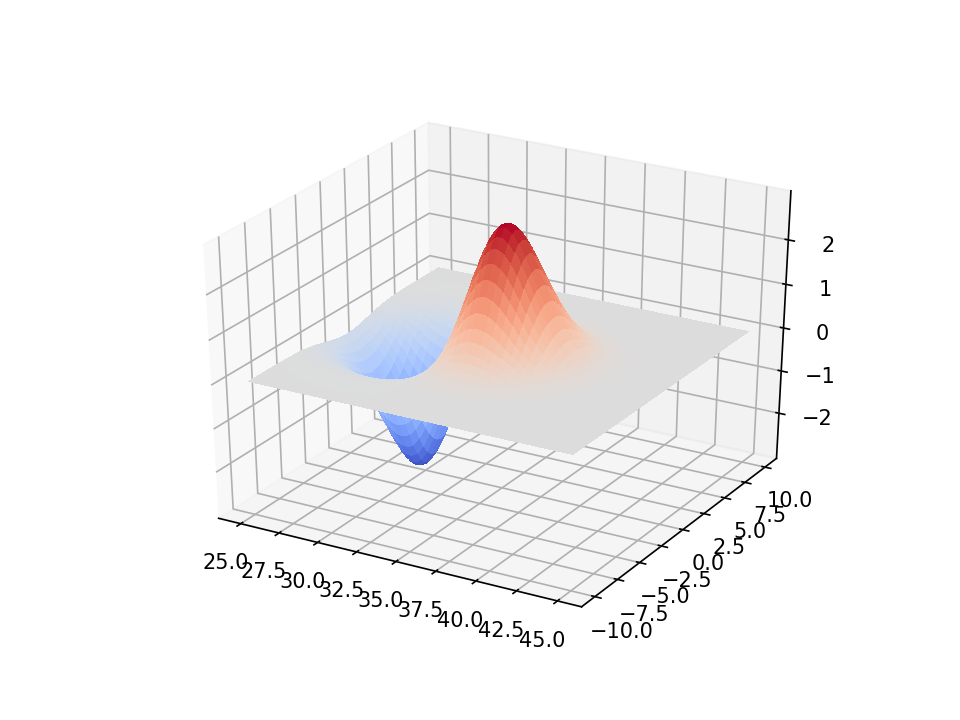

In [55]:

movement_var=5

g0=target(100,xs,ys,35,0,target_size*6)
g1=target(-100,xs,ys,30,0,penalty_size*6)

expected_gain = np.multiply(g0, gauss2d(xs,ys,movement_var,35,0)) +  np.multiply(g1, gauss2d(xs,ys,movement_var,30,0))
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xs, ys, expected_gain, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

In [56]:
# Let's explore the influence of changing the gain. 

def plot_expected_gain(g0,g1,movement_var):
    xs, ys = np.meshgrid(np.linspace(25,45),np.linspace(-10,10))

    expected_gain = g0*gauss2d(xs,ys,movement_var,35,0) + g1*gauss2d(xs,ys,movement_var,30,0)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    surf = ax.plot_surface(xs, ys, expected_gain,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    
    plt.xlabel('Y angle (degrees)')
    plt.ylabel('Z angle (degrees)')
    return expected_gain.argmax(axis=1)


In [57]:

interact(plot_expected_gain,g0=100,g1=(-500,0),movement_var=(0,20))

<function __main__.plot_expected_gain>

<IPython.core.display.Javascript object>


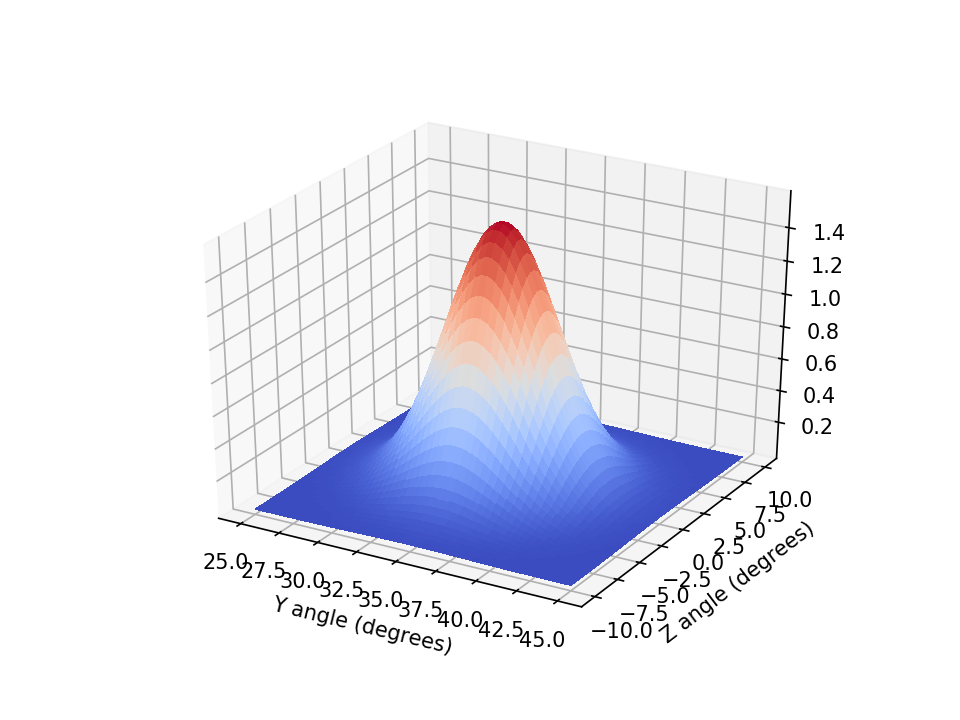

array([24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24], dtype=int64)

In [58]:
plot_expected_gain(100,0,10)

<IPython.core.display.Javascript object>


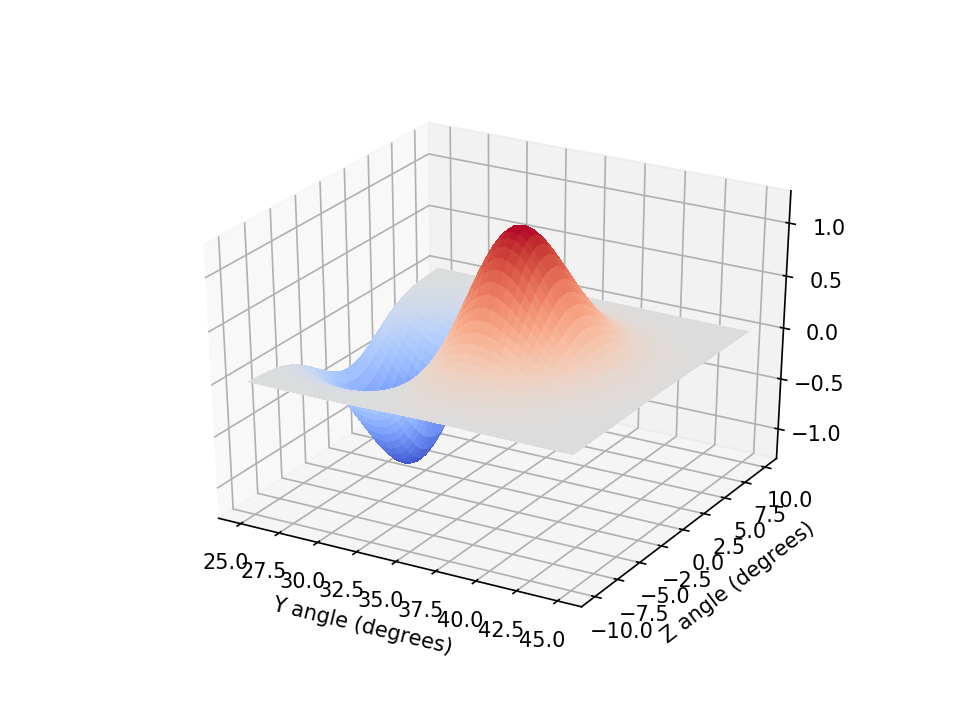

array([27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27], dtype=int64)

In [59]:
plot_expected_gain(100,-100,10)

<IPython.core.display.Javascript object>


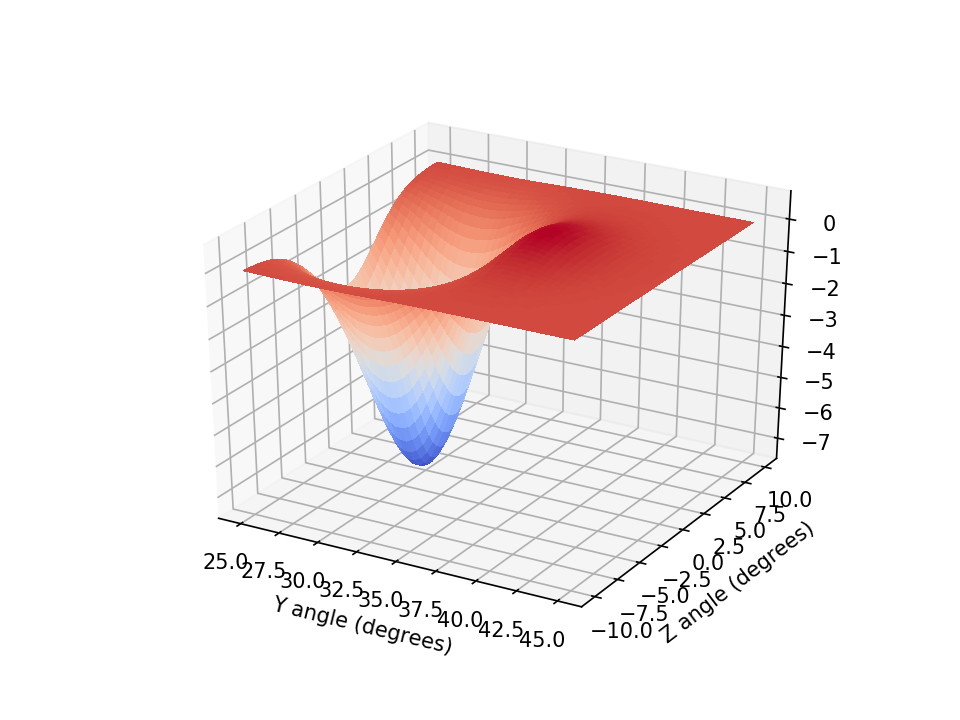

array([31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
       31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
       31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31], dtype=int64)

In [60]:
plot_expected_gain(100,-500,10)